In [1]:
import torch

import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm_notebook as tqdm

from skimage import transform
from torch.utils.data import DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [2]:
import seaborn as sns
sns.set(rc={"figure.figsize": (15, 6)})
sns.set_palette(sns.color_palette("Set2", 10))

In [3]:
torch.__version__

'1.0.1.post2'

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [5]:
from dataset import *
from show import *

# Loading Dataset

In [6]:
patch_size = 256

In [9]:
dset = BuildingsDatasetH5("data/images_{}.hdf5".format(patch_size))

In [10]:
idx = 13
sample = dset[idx]
img, lbl = sample['image'], sample['label']
label_names = dset.labels

print(img.shape, img.dtype)
print(lbl.shape, lbl.dtype)
print(label_names)

torch.Size([3, 256, 256]) torch.float32
torch.Size([1, 256, 256]) torch.int64
{'_background_': 0, 'door': 1, 'object': 2, 'wall': 3, 'window': 4}


# Displaying data

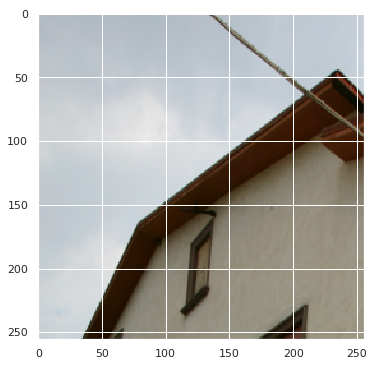

In [11]:
show_img(img)

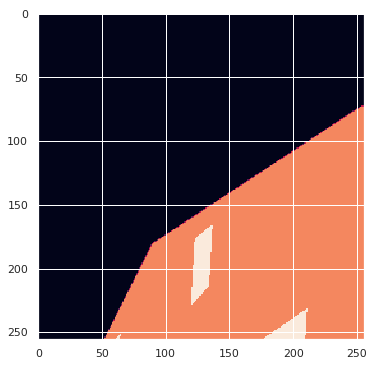

In [12]:
show_img(lbl)

(256, 256, 3) (256, 256, 1)


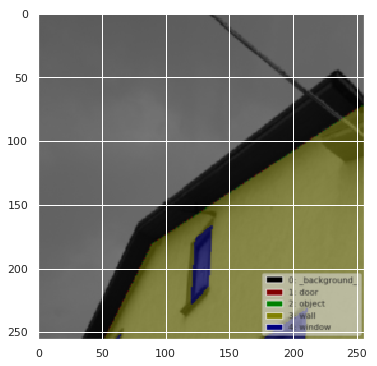

In [13]:
show_labeled_img(img, lbl, label_names)

# Going further

In [14]:
dataloader = DataLoader(dset, batch_size=4, shuffle=True, num_workers=4)

0 torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])
1 torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])
2 torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])
3 torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])
4 torch.Size([4, 3, 256, 256]) torch.Size([4, 1, 256, 256])
(260, 1034, 3) (260, 1034)


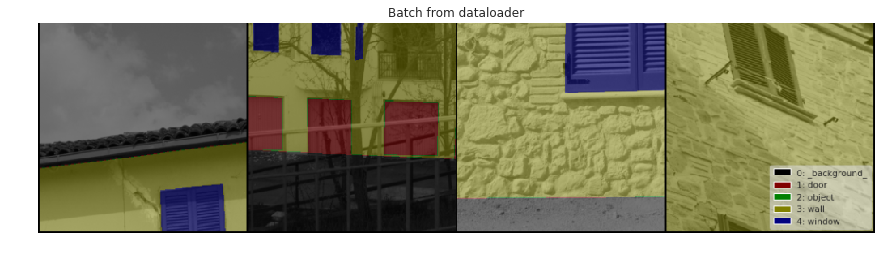

In [18]:
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(), sample_batched['label'].size())

    # just testing, we don't iterate over the whole thing...
    if i_batch == 4:
        plt.figure()
        show_batch(sample_batched, label_names, 4)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break